# Data Preparation

In [3]:
import pandas as pd

# Load the CSV file (adjust the path as necessary)
df = pd.read_csv("olist_orders_dataset.csv")

In [5]:
# Step 1: Parse/convert all datetime fields
datetime_cols = [
    'order_purchase_timestamp', 
    'order_approved_at', 
    'order_delivered_carrier_date', 
    'order_delivered_customer_date', 
    'order_estimated_delivery_date'
]

for col in datetime_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [7]:
# Step 2: Calculate delivery duration (in days)
df['delivery_duration_days'] = (
    df['order_delivered_customer_date'] - df['order_delivered_carrier_date']
).dt.total_seconds() / 86400  # 86400 seconds in a day

In [9]:
# Step 3: Calculate wait time (from order approval to courier pickup)
df['wait_time_days'] = (
    df['order_delivered_carrier_date'] - df['order_approved_at']
).dt.total_seconds() / 86400

In [11]:
# Step 4: Flag late deliveries (delivered after estimated date)
df['is_late'] = df['order_delivered_customer_date'] > df['order_estimated_delivery_date']

In [13]:
# Step 5: Flag failed deliveries (no customer delivery timestamp)
df['is_failed'] = df['order_delivered_customer_date'].isna()

In [15]:
# Step 6: Display or export enriched dataset
print(df[['order_id', 'delivery_duration_days', 'wait_time_days', 'is_late', 'is_failed']].head())

                           order_id  delivery_duration_days  wait_time_days  \
0  e481f51cbdc54678b7cc49136f2d6af7                6.062650        2.366493   
1  53cdb2fc8bc7dce0b6741e2150273451               12.039410        0.462882   
2  47770eb9100c2d0c44946d9cf07ec65d                9.178113        0.204595   
3  949d5b44dbf5de918fe9c16f97b45f8a                9.450498        3.745833   
4  ad21c59c0840e6cb83a9ceb5573f8159                1.937824        0.893113   

   is_late  is_failed  
0    False      False  
1    False      False  
2    False      False  
3    False      False  
4    False      False  


In [17]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   delivery_duration_days         96475 non-null  float64       
 9   wait_time_days                 97644 non-null  float64       
 10  is_late                        99441 non-null  bool          
 11  is_failed      

In [19]:
# Step 2: Drop rows with any null value
df_cleaned = df.dropna()

In [21]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   delivery_duration_days         96475 non-null  float64       
 9   wait_time_days                 97644 non-null  float64       
 10  is_late                        99441 non-null  bool          
 11  is_failed      

In [23]:
# Step 3: Verify if nulls are removed
print("\n✅ Null values removed. New shape:", df_cleaned.shape)
print("Null values per column after cleaning:")
print(df_cleaned.isnull().sum())


✅ Null values removed. New shape: (96461, 12)
Null values per column after cleaning:
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
delivery_duration_days           0
wait_time_days                   0
is_late                          0
is_failed                        0
dtype: int64


In [25]:
print(df[['order_id', 'delivery_duration_days', 'wait_time_days', 'is_late', 'is_failed']].head())

                           order_id  delivery_duration_days  wait_time_days  \
0  e481f51cbdc54678b7cc49136f2d6af7                6.062650        2.366493   
1  53cdb2fc8bc7dce0b6741e2150273451               12.039410        0.462882   
2  47770eb9100c2d0c44946d9cf07ec65d                9.178113        0.204595   
3  949d5b44dbf5de918fe9c16f97b45f8a                9.450498        3.745833   
4  ad21c59c0840e6cb83a9ceb5573f8159                1.937824        0.893113   

   is_late  is_failed  
0    False      False  
1    False      False  
2    False      False  
3    False      False  
4    False      False  


In [27]:
# Display the first 5 rows
print(df.head())

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15

In [29]:
# Optional: Save to a new CSV
# df.to_csv("enriched_orders_dataset.csv", index=False)

In [31]:
# Print the first 5 rows of the cleaned dataset
print(df[['order_id', 'delivery_duration_days', 'wait_time_days', 'is_late', 'is_failed']].head())

                           order_id  delivery_duration_days  wait_time_days  \
0  e481f51cbdc54678b7cc49136f2d6af7                6.062650        2.366493   
1  53cdb2fc8bc7dce0b6741e2150273451               12.039410        0.462882   
2  47770eb9100c2d0c44946d9cf07ec65d                9.178113        0.204595   
3  949d5b44dbf5de918fe9c16f97b45f8a                9.450498        3.745833   
4  ad21c59c0840e6cb83a9ceb5573f8159                1.937824        0.893113   

   is_late  is_failed  
0    False      False  
1    False      False  
2    False      False  
3    False      False  
4    False      False  


In [33]:
import os

# Get current working directory (not the file path)
cwd = os.getcwd()
print("Current working directory:", cwd)

Current working directory: C:\Users\debji


In [35]:
# Save the cleaned and enriched DataFrame to a new CSV file
df.to_csv("cleaned_orders_dataset.csv", index=False)

In [37]:
import os

print(os.getcwd())

C:\Users\debji


# Compute KPI Metrics

In [5]:
import pandas as pd

# Load your cleaned dataset
df = pd.read_csv("cleaned_orders_dataset.csv")


In [7]:
# Convert timestamps to datetime
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'], errors='coerce')

In [9]:
# Calculate KPIs
total_orders = len(df)
on_time_deliveries = df['is_late'].value_counts().get(False, 0)
on_time_delivery_pct = (on_time_deliveries / total_orders) * 100
avg_delivery_duration = df['delivery_duration_days'].mean()
avg_idle_time = df['wait_time_days'].mean()

In [11]:
# Display results
kpi_summary = {
    "Total Orders": total_orders,
    "On-Time Delivery %": round(on_time_delivery_pct, 2),
    "Average Delivery Duration (days)": round(avg_delivery_duration, 2),
    "Average Idle Time (days)": round(avg_idle_time, 2)
}

print(kpi_summary)

{'Total Orders': 4884, 'On-Time Delivery %': 92.12, 'Average Delivery Duration (days)': 9.14, 'Average Idle Time (days)': 2.83}


In [13]:
#On-Time Delivery % shows how many orders arrived before the promised time.

#Average Delivery Duration tells how long deliveries typically take.

#Average Idle Time reveals how long couriers wait between approval and pickup.

In [15]:
# Extract time-based features
df['purchase_date'] = df['order_purchase_timestamp'].dt.date
df['purchase_hour'] = df['order_purchase_timestamp'].dt.hour
df['purchase_month'] = df['order_purchase_timestamp'].dt.to_period('M')

In [17]:
# Define shifts
def get_shift(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['purchase_shift'] = df['purchase_hour'].apply(get_shift)

In [19]:
# Optional: save updated file
df.to_csv("orders_with_shifts.csv", index=False)

In [21]:
#Adds new columns for date, hour, and month of purchase.

#Classifies orders into shifts based on time of day.

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

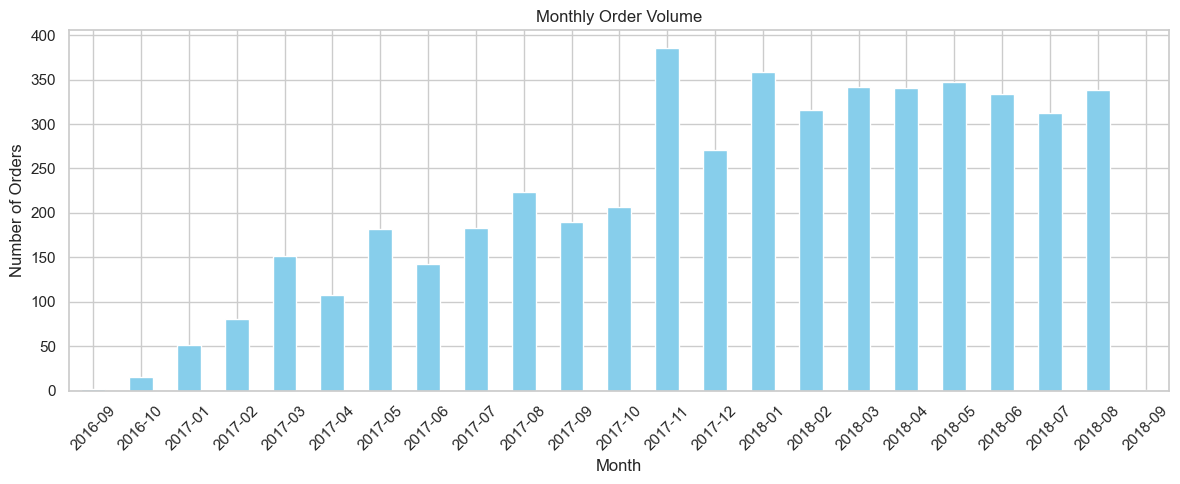

In [25]:
# 1. 📈 Monthly Order Trend
plt.figure(figsize=(12, 5))
monthly_orders = df.groupby('purchase_month')['order_id'].count()
monthly_orders.plot(kind='bar', color='skyblue')
plt.title("Monthly Order Volume")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\debji\AppData\Local\Temp\ipykernel_31956\2417581446.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='purchase_shift', y='delivery_duration_days', data=df, palette='Set2')


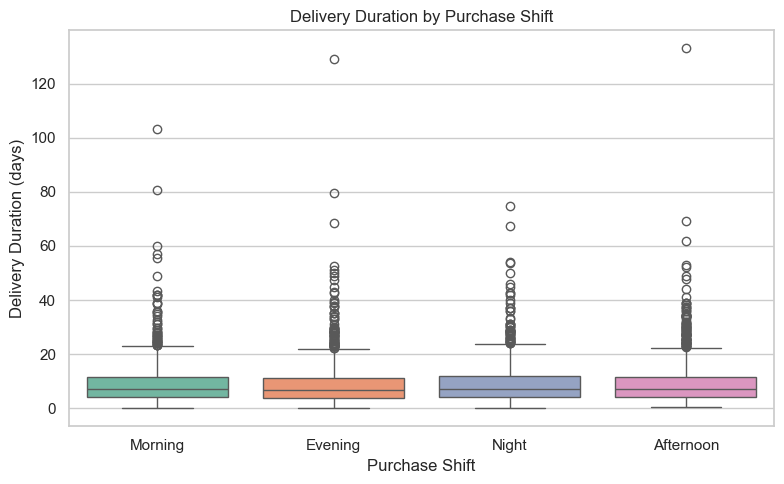

In [27]:
# 2. 🌗 Shift-wise Delivery Duration
plt.figure(figsize=(8, 5))
sns.boxplot(x='purchase_shift', y='delivery_duration_days', data=df, palette='Set2')
plt.title("Delivery Duration by Purchase Shift")
plt.xlabel("Purchase Shift")
plt.ylabel("Delivery Duration (days)")
plt.tight_layout()
plt.show()

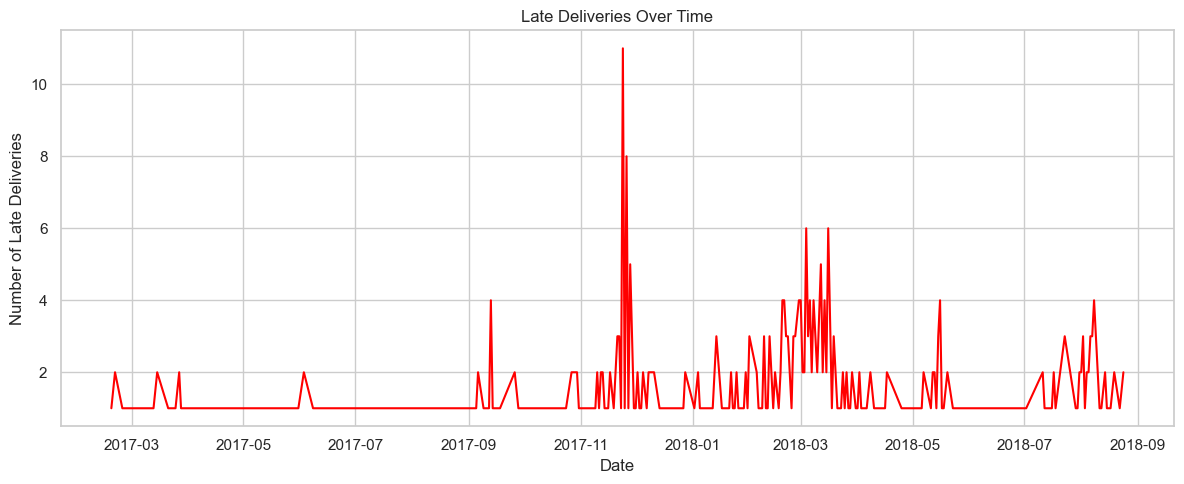

In [29]:
# 3. 🔥 Daily Late Delivery Hotspots
plt.figure(figsize=(12, 5))
daily_late = df[df['is_late'] == True].groupby('purchase_date')['order_id'].count()
daily_late.plot(kind='line', color='red')
plt.title("Late Deliveries Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Late Deliveries")
plt.tight_layout()
plt.show()

In [31]:
#✅ 1. Monthly Trend
#Helps identify busy seasons or declining demand.

#Useful for planning courier capacity.

#✅ 2. Shift-wise Analysis
#Compares average delivery duration across shifts.

#You might notice that night purchases result in slower delivery.

#✅ 3. Late Delivery Hotspots
#Shows which days saw a spike in delays.

#You can further zoom in to investigate why those days had issues (e.g., holidays, weather, strikes).



# Visualize Performance by City

C:\Users\debji\AppData\Local\Temp\ipykernel_31956\121161375.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_late_pct, x='City', y='Late Delivery %', palette='Reds')


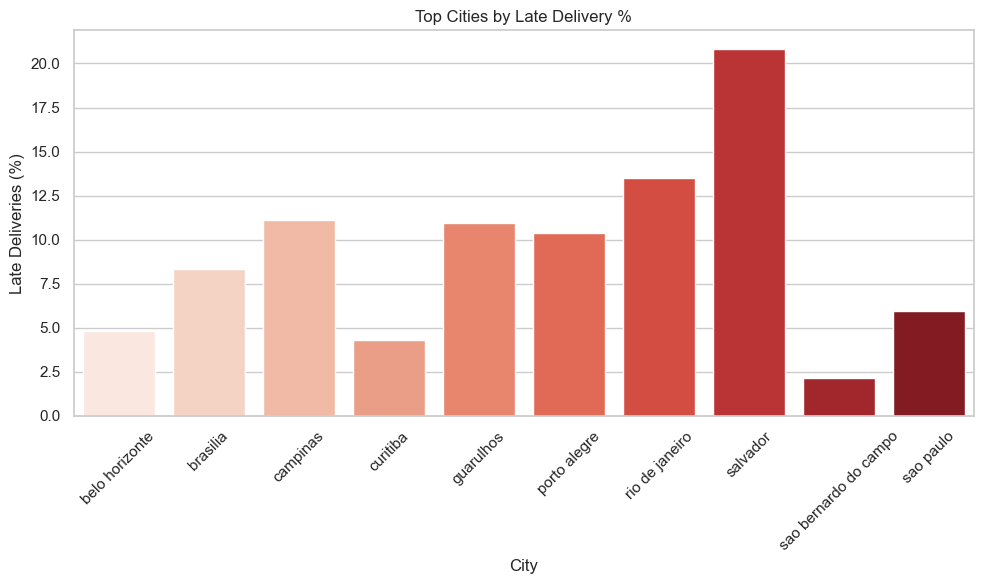

In [34]:
# Load merged data with city
orders_df = pd.read_csv("cleaned_orders_dataset.csv")
customers_df = pd.read_csv("olist_customers_dataset.csv")

# Merge to get city
merged_df = pd.merge(
    orders_df,
    customers_df[['customer_id', 'customer_city', 'customer_state']],
    on='customer_id',
    how='left'
)

# Calculate late delivery % per city (top 10 by volume)
city_volume = merged_df['customer_city'].value_counts().head(10).index
top_cities = merged_df[merged_df['customer_city'].isin(city_volume)]

city_late_pct = top_cities.groupby('customer_city')['is_late'].mean().reset_index()
city_late_pct.columns = ['City', 'Late Delivery %']
city_late_pct['Late Delivery %'] *= 100

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=city_late_pct, x='City', y='Late Delivery %', palette='Reds')
plt.title("Top Cities by Late Delivery %")
plt.xticks(rotation=45)
plt.ylabel("Late Deliveries (%)")
plt.tight_layout()
plt.show()

# Visualize Performance by Shift

In [37]:
print (df.head())

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08

C:\Users\debji\AppData\Local\Temp\ipykernel_31956\1321443370.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='purchase_shift', y='delivery_duration_days', palette='Blues')


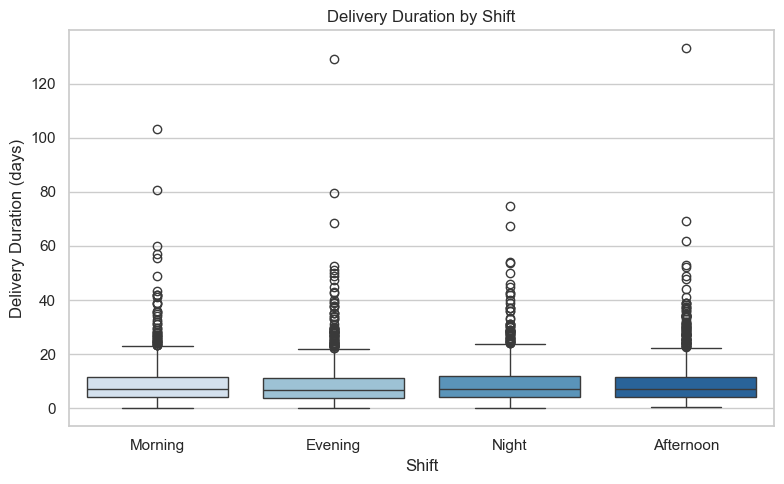

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Make sure 'order_purchase_timestamp' is datetime
merged_df['order_purchase_timestamp'] = pd.to_datetime(merged_df['order_purchase_timestamp'], errors='coerce')

# Step 2: Extract purchase_hour from timestamp
merged_df['purchase_hour'] = merged_df['order_purchase_timestamp'].dt.hour

# Step 3: Define the shift function
def get_shift(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Step 4: Apply shift function to new column
merged_df['purchase_shift'] = merged_df['purchase_hour'].apply(get_shift)

# Step 5: Plot Delivery Duration by Shift
plt.figure(figsize=(8, 5))
sns.boxplot(data=merged_df, x='purchase_shift', y='delivery_duration_days', palette='Blues')
plt.title("Delivery Duration by Shift")
plt.xlabel("Shift")
plt.ylabel("Delivery Duration (days)")
plt.tight_layout()
plt.show()

In [41]:
# Show the first 5 rows
merged_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_duration_days,wait_time_days,is_late,is_failed,customer_city,customer_state,purchase_hour,purchase_shift
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.062650,2.366493,False,False,sao paulo,SP,10.0,Morning
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.039410,0.462882,False,False,barreiras,BA,20.0,Evening
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.178113,0.204595,False,False,vianopolis,GO,8.0,Morning
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9.450498,3.745833,False,False,sao goncalo do amarante,RN,19.0,Evening
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.937824,0.893113,False,False,santo andre,SP,21.0,Night


# Late Delivery % by Shift

In [44]:
print(merged_df['is_late'].isnull().sum())  # how many NaNs

1


In [46]:
# Convert is_late (True/False/NaN) to numeric (1/0)
merged_df['is_late_numeric'] = merged_df['is_late'].map({True: 1, False: 0, None: 0, pd.NA: 0, float('nan'): 0}).astype(int)

In [48]:
# Drop rows where is_late is NaN
merged_df = merged_df.dropna(subset=['is_late'])

In [50]:
# Now convert True/False to 1/0 (safe since no NaNs now)
merged_df['is_late_numeric'] = merged_df['is_late'].astype(int)

In [52]:
print(merged_df['is_late'].isnull().sum())  # should print 0

0


In [54]:
print(merged_df[['is_late', 'is_late_numeric']].head())

  is_late  is_late_numeric
0   False                0
1   False                0
2   False                0
3   False                0
4   False                0


C:\Users\debji\AppData\Local\Temp\ipykernel_31956\602291929.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=late_by_shift, x='purchase_shift', y='Late %', palette='Reds')


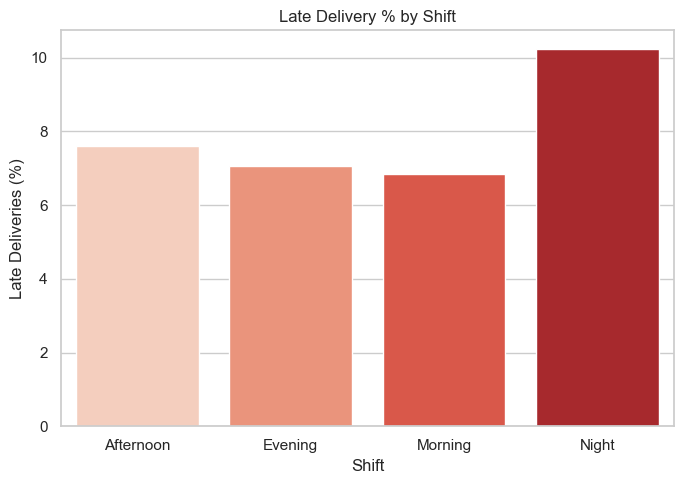

In [56]:
# Convert boolean to numeric: True → 1 (late), False → 0 (on-time)
merged_df['is_late_numeric'] = merged_df['is_late'].astype(int)

# Group and calculate late delivery %
late_by_shift = merged_df.groupby('purchase_shift')['is_late_numeric'].mean().reset_index()
late_by_shift['Late %'] = late_by_shift['is_late_numeric'] * 100

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
sns.barplot(data=late_by_shift, x='purchase_shift', y='Late %', palette='Reds')
plt.title("Late Delivery % by Shift")
plt.ylabel("Late Deliveries (%)")
plt.xlabel("Shift")
plt.tight_layout()
plt.show()

# Average Idle Time (Wait Time) by Shift

C:\Users\debji\AppData\Local\Temp\ipykernel_31956\1226062729.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=idle_by_shift, x='purchase_shift', y='Avg Idle Time (days)', palette='Oranges')


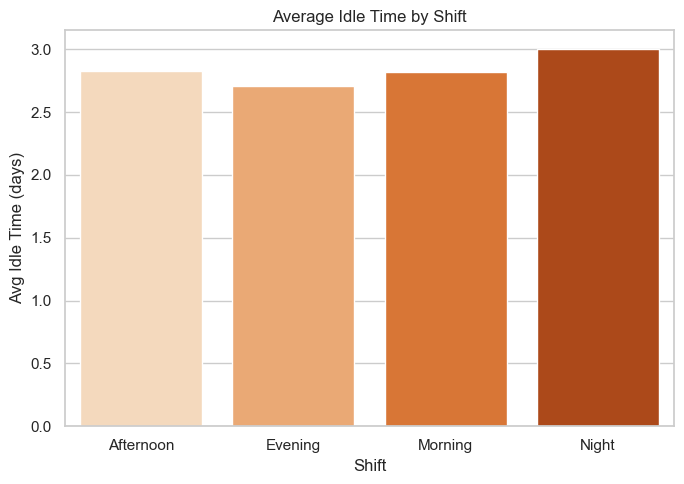

In [59]:
# Group and calculate average wait time (idle time before delivery starts)
idle_by_shift = merged_df.groupby('purchase_shift')['wait_time_days'].mean().reset_index()
idle_by_shift.columns = ['purchase_shift', 'Avg Idle Time (days)']

# Plot
plt.figure(figsize=(7, 5))
sns.barplot(data=idle_by_shift, x='purchase_shift', y='Avg Idle Time (days)', palette='Oranges')
plt.title("Average Idle Time by Shift")
plt.xlabel("Shift")
plt.ylabel("Avg Idle Time (days)")
plt.tight_layout()
plt.show()

In [61]:
import numpy as np

np.random.seed(0)
merged_df['courier'] = np.random.choice(['Courier_A', 'Courier_B', 'Courier_C'], size=len(merged_df))

In [63]:
# Show the first few rows
print(merged_df.head())

# Check the shape and columns
print(merged_df.shape)
print(merged_df.columns)

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08

In [65]:
import os

# Define filename and save path
file_name = "merged_orders_customers.csv"
save_path = os.path.abspath(file_name)

# Save merged DataFrame to CSV
merged_df.to_csv(save_path, index=False)

# Print the full file location
print(f"Merged file saved at: {save_path}")

Merged file saved at: C:\Users\debji\merged_orders_customers.csv


# Predictive Modelling

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

df = pd.read_csv("merged_orders_customers.csv")

# Select relevant columns
df_model = df[['purchase_hour', 'customer_state', 'courier', 'is_failed']].copy()

In [74]:
# Drop missing values
df_model.dropna(inplace=True)

In [76]:
# Encode categorical variables
le_state = LabelEncoder()
le_courier = LabelEncoder()

In [78]:
df_model['region_encoded'] = le_state.fit_transform(df_model['customer_state'])
df_model['vehicle_encoded'] = le_courier.fit_transform(df_model['courier'])

In [80]:
# Features and target
X = df_model[['purchase_hour', 'region_encoded', 'vehicle_encoded']]
y = df_model['is_failed']

In [82]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.98      1.00      0.99       956
        True       0.00      0.00      0.00        21

    accuracy                           0.98       977
   macro avg       0.49      0.50      0.49       977
weighted avg       0.96      0.98      0.97       977



In [92]:
#✅ F1-Score in Simple Words
#The F1 score is a number that helps us measure how good a classification model is — especially when you're working with imbalanced data (like very few delivery failures compared to many successes).

#Simple Breakdown
#It combines two things:

#Precision = How many of the predicted "failures" were actually failures?
#(Avoids false alarms)


#Recall = How many of the actual failures did we correctly predict?
#(Avoids missed cases)

#F1 = Balance Between Precision & Recall
#It’s like saying:

#“Let’s not just be accurate, let’s be fair and careful — don’t miss real issues, but don’t falsely raise alarms either.”
​
 
#It gives higher scores only when both Precision and Recall are high.

#In Your Case (Delivery Failure Prediction)
#A low F1-score for "True" (failures) means:

#Your model is missing most failures (low recall)

#And/or incorrectly guessing failures (low precision)

#High F1-score = better balance and smarter model



SyntaxError: invalid non-printable character U+200B (4187818908.py, line 18)

# Logistic Regression

In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Load data
df = pd.read_csv("merged_orders_customers.csv")

# Select relevant features and target
features = df[['purchase_hour', 'customer_state', 'courier']]
target = df['is_late'].astype(int)  # Convert boolean to int

# Drop rows with missing values in relevant columns
df_model = features.copy()
df_model['is_late'] = target
df_model.dropna(inplace=True)

# Encode categorical variables
le_state = LabelEncoder()
le_courier = LabelEncoder()
df_model['customer_state'] = le_state.fit_transform(df_model['customer_state'])
df_model['courier'] = le_courier.fit_transform(df_model['courier'])

# Define feature matrix and target vector
X = df_model[['purchase_hour', 'customer_state', 'courier']]
y = df_model['is_late']

In [97]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [99]:
# Predict
y_pred = model.predict(X_test)

In [101]:
# Evaluate
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       902
           1       0.00      0.00      0.00        75

    accuracy                           0.92       977
   macro avg       0.46      0.50      0.48       977
weighted avg       0.85      0.92      0.89       977



C:\Users\debji\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\debji\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\debji\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [103]:
#🎯 Precision
Precision for class 1 (Late) is 0.00.

It means: when your model predicted “late”, it was never correct.

📦 Example: If your model predicted 10 deliveries would be late, 0 were actually late. That’s 0% precision.

🎯 Recall
Recall for class 1 (Late) is 0.00.

It means: out of all the actual late deliveries, the model didn't catch any.

📦 Example: Out of 75 actual late deliveries, the model predicted 0 correctly. So it missed them all.

🎯 F1-score
F1-score is a balance between precision and recall.

For late deliveries (class 1), it's also 0.00, meaning the model is completely failing on this class.

✅ For Class 0 (On Time Deliveries)
Precision = 0.92: Out of all predicted “on-time” deliveries, 92% were correct.

Recall = 1.00: Out of all actual “on-time” deliveries, 100% were correctly identified.

F1 = 0.96: Almost perfect!

The model is very good at predicting on-time deliveries but completely failing on late deliveries.

🧮 Accuracy = 92% 🤔
That sounds great, but it’s misleading!

Why? Because most deliveries are on time (902 out of 977).

If the model just predicts “on-time” for everything, it would be right 92% of the time — but it would never detect a late one.

⚠️ Problem: Imbalanced Dataset
Your model is biased towards predicting on-time deliveries because:

There are many more on-time deliveries (902) than late ones (75).

So it learns to “play safe” and always say “on-time”.

SyntaxError: invalid character '“' (U+201C) (3188190812.py, line 4)

# Random Forrest and XGBoost

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [108]:
#Prepare your data

df_model = df[['purchase_hour', 'customer_state', 'courier', 'is_failed']].copy()
df_model.dropna(inplace=True)

In [110]:
#Encode Categorical Columns

le_state = LabelEncoder()
le_courier = LabelEncoder()

df_model['customer_state'] = le_state.fit_transform(df_model['customer_state'])
df_model['courier'] = le_courier.fit_transform(df_model['courier'])

In [112]:
#Train/Test Split

X = df_model[['purchase_hour', 'customer_state', 'courier']]
y = df_model['is_failed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
#Handle Class Imbalance Using SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [116]:
#Train Random Forest Model

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [118]:
#Predict and Evaluate

y_pred = rf_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.98      0.88      0.93       956
        True       0.04      0.24      0.07        21

    accuracy                           0.86       977
   macro avg       0.51      0.56      0.50       977
weighted avg       0.96      0.86      0.91       977



# XGBoost

In [121]:
# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

# Step 2: Load data
df = pd.read_csv("merged_orders_customers.csv")

# Step 3: Select relevant features
df_model = df[['purchase_hour', 'customer_state', 'courier', 'is_failed']].copy()
df_model.dropna(inplace=True)

# Step 4: Encode categorical variables
le_state = LabelEncoder()
le_courier = LabelEncoder()

df_model['customer_state'] = le_state.fit_transform(df_model['customer_state'])
df_model['courier'] = le_courier.fit_transform(df_model['courier'])

# Step 5: Define features and target
X = df_model[['purchase_hour', 'customer_state', 'courier']]
y = df_model['is_failed']

# Step 6: Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Step 8: Train XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_resampled, y_resampled)

# Step 9: Make predictions
y_pred = model.predict(X_test)

In [123]:
# Step 10: Evaluate
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

       False       0.98      0.85      0.91       956
        True       0.03      0.24      0.06        21

    accuracy                           0.84       977
   macro avg       0.51      0.54      0.48       977
weighted avg       0.96      0.84      0.89       977



In [125]:
#Improved one

In [127]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_sample_weight

# Load dataset
df = pd.read_csv("merged_orders_customers.csv")

# Keep only relevant columns
df_model = df[['purchase_hour', 'customer_state', 'courier', 'is_late']]
df_model.dropna(inplace=True)

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df_model, columns=['customer_state', 'courier'], drop_first=True)

# Features and Target
X = df_encoded.drop('is_late', axis=1)
y = df_encoded['is_late']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Compute sample weights for imbalance
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train_resampled)

# Train XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=10)
xgb.fit(X_train_scaled, y_train_resampled, sample_weight=sample_weights)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [129]:
# Predict and Evaluate
y_pred = xgb.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.93      0.46      0.61      1350
        True       0.08      0.57      0.14       115

    accuracy                           0.47      1465
   macro avg       0.50      0.51      0.38      1465
weighted avg       0.86      0.47      0.58      1465



In [131]:
#Threshold Tuning

In [135]:
print(X_train_scaled.shape)
print(y_train.shape)

(6298, 29)
(3418,)


In [141]:
from sklearn.preprocessing import OneHotEncoder

X = pd.get_dummies(X, drop_first=True)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

In [143]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [145]:
# Fit model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Predict probabilities
y_probs = xgb.predict_proba(X_test)[:, 1]

In [147]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # ONLY features

In [149]:
print(X_train.shape, y_train.shape)

(3418, 29) (3418,)


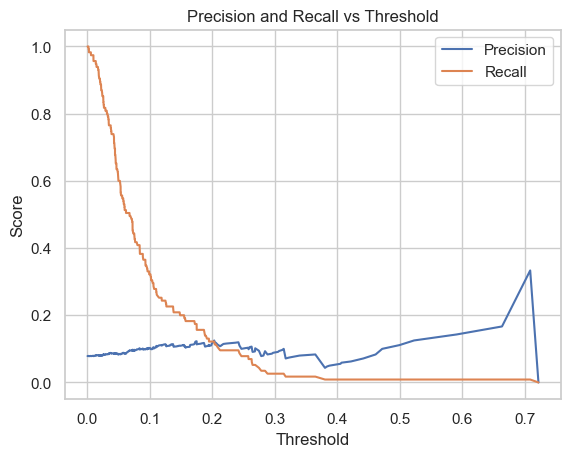

In [151]:
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.show()

In [153]:
threshold = 0.3
y_pred_tuned = (y_probs >= threshold).astype(int)

In [155]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_tuned))

              precision    recall  f1-score   support

       False       0.92      0.98      0.95      1350
        True       0.09      0.03      0.04       115

    accuracy                           0.90      1465
   macro avg       0.51      0.50      0.49      1465
weighted avg       0.86      0.90      0.88      1465



In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Load the dataset
df = pd.read_csv('merged_orders_customers.csv')

# --- Data Preprocessing ---
# Drop unnecessary columns that are not suitable for a basic classification model
df = df.drop(columns=['order_id', 'customer_id', 'order_purchase_timestamp', 'order_approved_at',
                      'order_delivered_carrier_date', 'order_delivered_customer_date',
                      'order_estimated_delivery_date', 'is_late', 'courier'])

# Handle missing values by dropping rows with any missing values
df = df.dropna()

# Convert the target variable to a numerical format if not already
df['is_late_numeric'] = df['is_late_numeric'].astype(int)

# Separate features (X) and target variable (y)
X = df.drop(columns='is_late_numeric')
y = df['is_late_numeric']

# Identify categorical and numerical columns for preprocessing
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()

# Create a preprocessor using ColumnTransformer for one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numerical_cols)
    ],
    remainder='drop'
)

# Apply the transformations
X_processed = preprocessor.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)

# --- Model Training with Class Weighting ---
# Initialize the RandomForestClassifier with balanced class weights
model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the model
model.fit(X_train, y_train)

# --- Model Evaluation ---
# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       872
           1       0.70      0.27      0.39        77

    accuracy                           0.93       949
   macro avg       0.82      0.63      0.68       949
weighted avg       0.92      0.93      0.92       949



In [5]:
# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[863   9]
 [ 56  21]]
